In [1]:
import os
import glob
import geopandas as gpd
import contextily as ctx
from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "32604"

ctx_kwargs = {
    "crs": f"EPSG:{map_crs}",
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
icesat = Altimetry(directory=directory, dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
icesat.request_atl06sr_multi_processing(
    save_to_parquet=True,
)

# icesat.request_atl06sr_multi_processing(
#     res=10,
#     len=20,
#     ats=20,
#     cnt=5,
#     maxi=5,
#     save_to_parquet=True,
#     processing_levels=["ground"],
# )


ICESat-2 ATL06 request processing for: high_confidence
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence.parquet
Filtering ATL06-SR high_confidence
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence_filtered.parquet

ICESat-2 ATL06 request processing for: ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground.parquet
Filtering ATL06-SR ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground_filtered.parquet

ICESat-2 ATL06 request processing for: canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy.parquet
Filtering ATL06-SR canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy_filtered.parquet

ICESat-2 ATL06 request processing for: top_of_canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_top_of_canopy.parquet
Filtering ATL06-SR top_of_canopy
Existing file found, r

In [5]:
icesat.atl06sr_processing_levels["high_confidence"].shape

(143834, 20)

In [6]:
icesat.atl06sr_processing_levels_filtered["high_confidence"].shape

(120963, 20)

In [7]:
# Filter by ESA WorldCover
icesat.filter_esa_worldcover(filter_out="water")

In [8]:
icesat.atl06sr_processing_levels_filtered["high_confidence"].shape

(34932, 20)

In [9]:
# User defined temporal filter
# icesat.generic_temporal_filter_atl06sr(
#     select_years=[2021, 2022, 2023],
#     select_months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     select_days=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
# )

In [10]:
# Predefined temporal filter
icesat.predefined_temporal_filter_atl06sr()


Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: high_confidence

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: ground

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: canopy

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: top_of_canopy


In [11]:
icesat.atl06sr_processing_levels_filtered["ground_seasonal"].shape

(12093, 20)

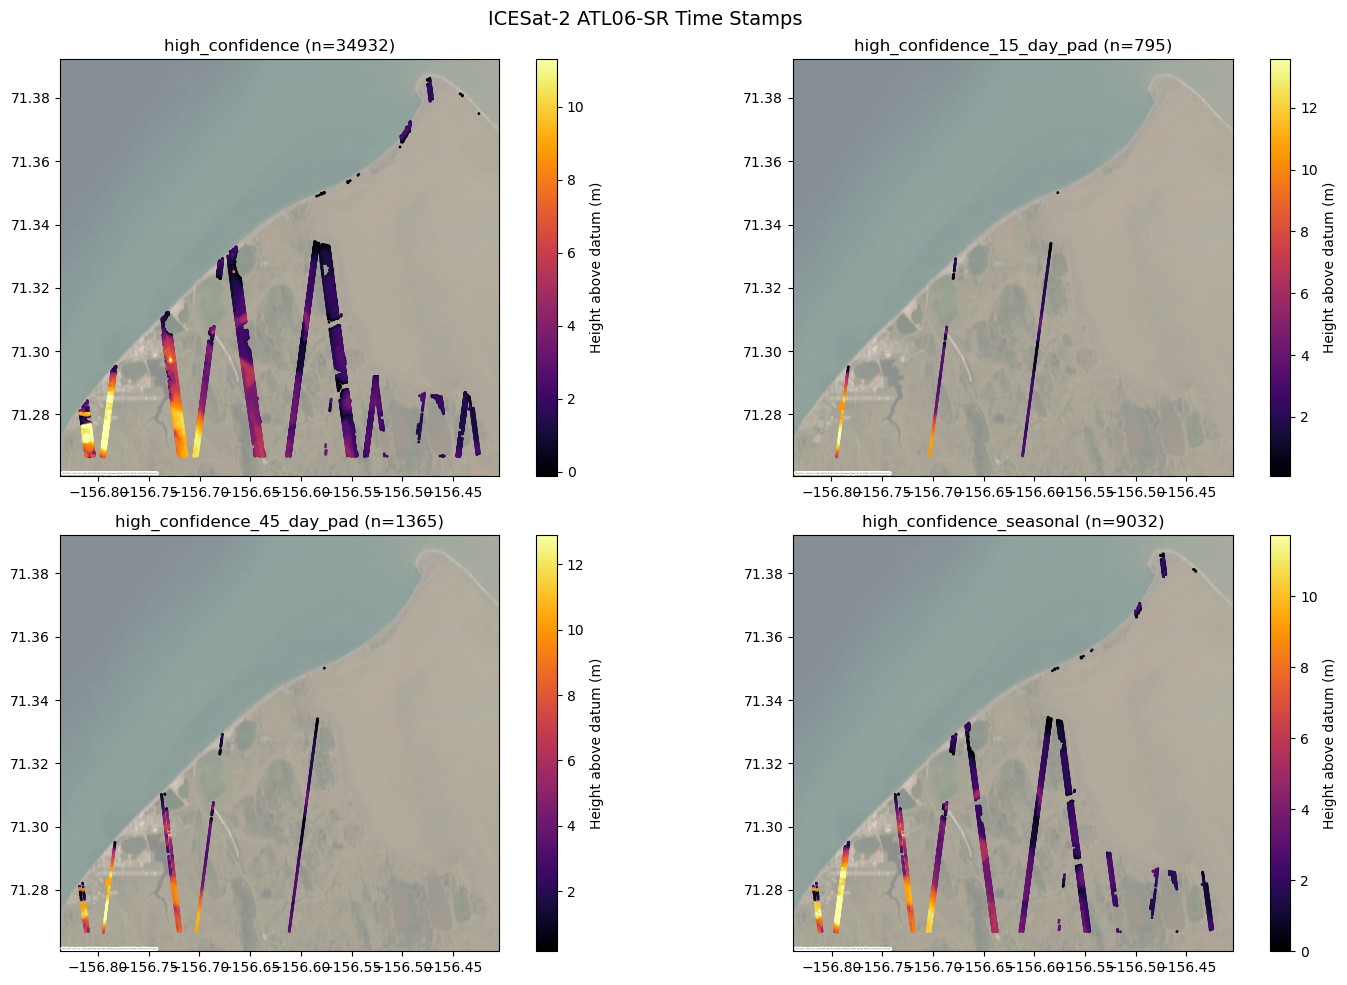

In [12]:
icesat.plot_atl06sr_time_stamps(
   key="high_confidence",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

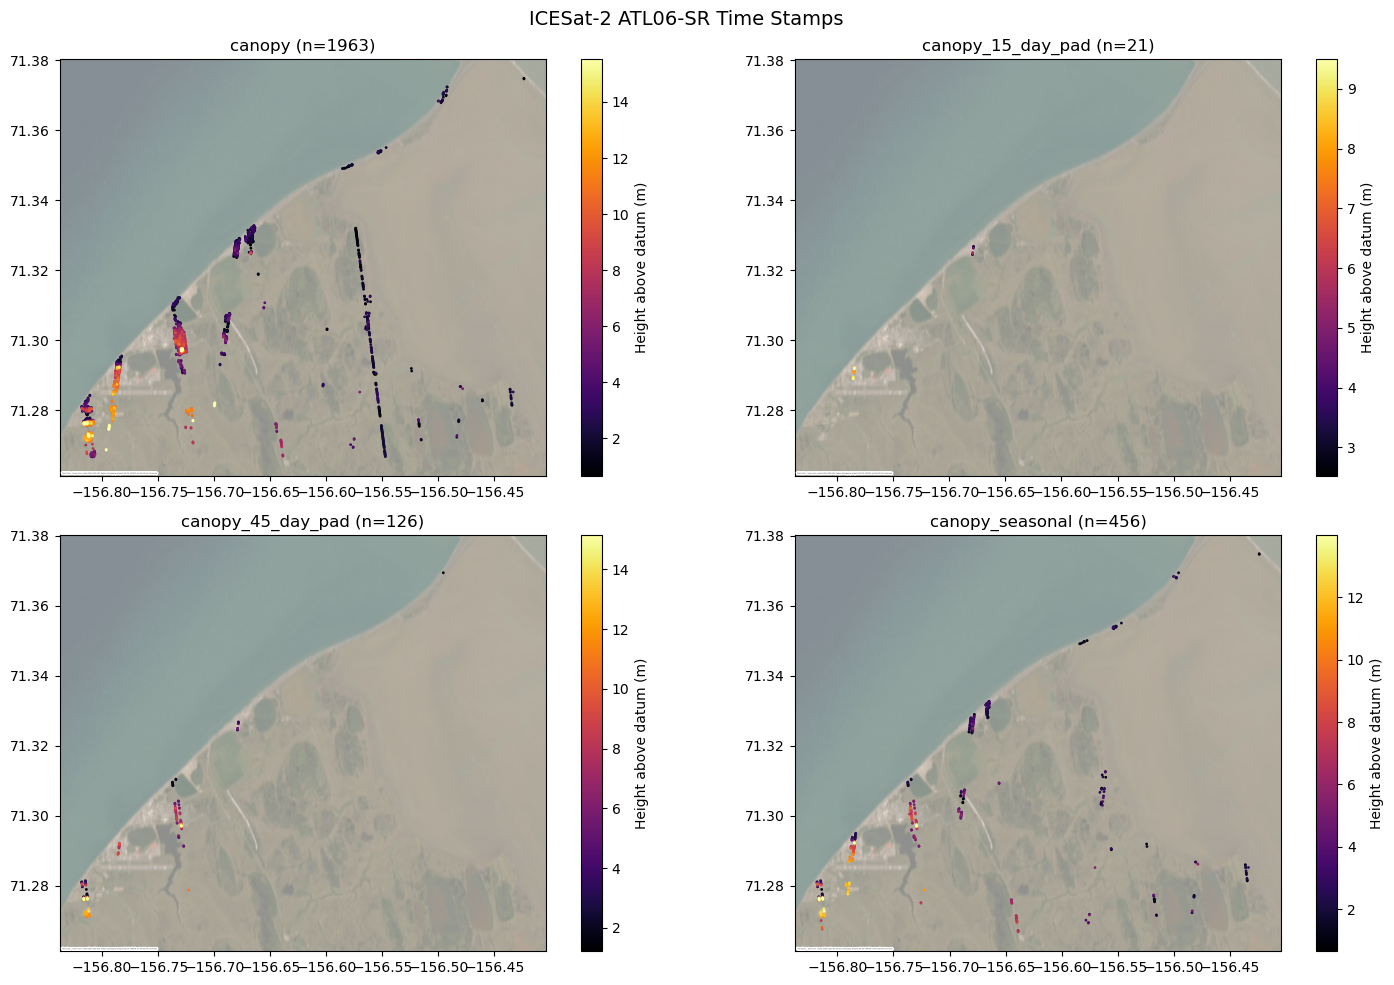

In [13]:
icesat.plot_atl06sr_time_stamps(
   key="canopy",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

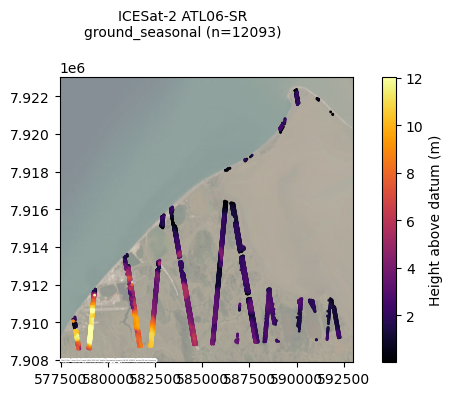

In [14]:
icesat.plot_atl06sr(
    key="ground_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

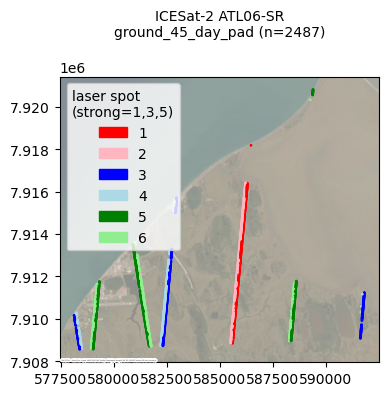

In [15]:
icesat.plot_atl06sr(
    key="ground_45_day_pad",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    plot_beams=True,
    **ctx_kwargs
)

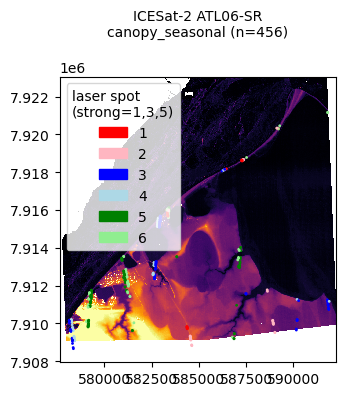

In [16]:
icesat.plot_atl06sr(
    key="canopy_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=True,
    plot_beams=True,
    **ctx_kwargs
)


icesat_minus_dem not found in ATL06 dataframe: ground_15_day_pad. Running differencing first.



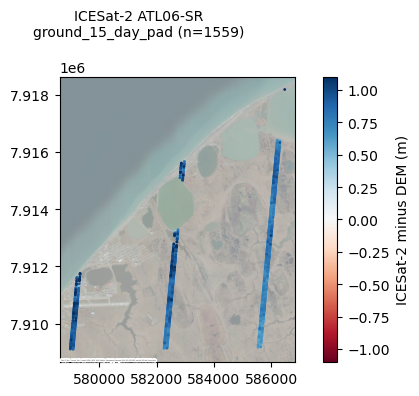

In [17]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    **ctx_kwargs,
)

In [18]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    plot_aligned=True,
    **ctx_kwargs,
)


Aligned DEM not found.



In [19]:
# Show a quick histogram
icesat.histogram(
    key="high_confidence_seasonal",
    plot_aligned=True,
)


Aligned DEM not found.



## WIP: PC Alignment Comparison

In [20]:
icesat.alignment_report(
    processing_level="high_confidence",
    minimum_points=500,
    write_out_aligned_dem=True,
    key_for_aligned_dem="high_confidence_15_day_pad",
)


high_confidence alignment report:
Input: error percentile of smallest errors (meters): 16%: 0.379974, 50%: 0.613481, 84%: 0.823963
Input: mean of smallest errors (meters): 25%: 0.305042, 50%: 0.422038, 75%: 0.509095, 100%: 0.664736
Output: error percentile of smallest errors (meters): 16%: 0.0449552, 50%: 0.151377, 84%: 0.332819
Output: mean of smallest errors (meters): 25%: 0.0355416, 50%: 0.0730141, 75%: 0.116036, 100%: 0.267471
Translation vector (Cartesian, meters): Vector3(0.092759045,0.68025135,-0.5164948)

ECEF shift: [ 0.09275904  0.68025135 -0.5164948 ]
Translation vector magnitude (meters): 0.85913504



high_confidence_15_day_pad alignment report:
Input: error percentile of smallest errors (meters): 16%: 0.633969, 50%: 0.789984, 84%: 0.918273
Input: mean of smallest errors (meters): 25%: 0.577839, 50%: 0.65724, 75%: 0.71529, 100%: 0.854417
Output: error percentile of smallest errors (meters): 16%: 0.030055, 50%: 0.094727, 84%: 0.207692
Output: mean of smallest errors (meter


icesat_minus_aligned_dem not found in ATL06 dataframe: ground_15_day_pad. Running differencing first.



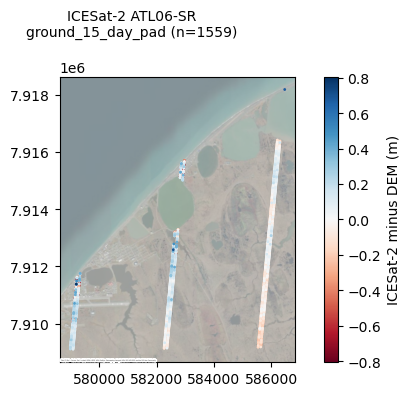

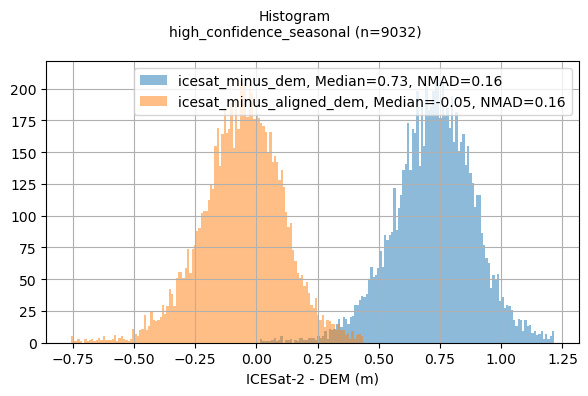

In [21]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    plot_aligned=True,
    **ctx_kwargs,
)

# Show a quick histogram
icesat.histogram(
    key="high_confidence_seasonal",
    plot_aligned=True,
)

## WIP: Profile plots

In [31]:
# Collect only the coincident filtereded data again for profile plotting
# icesat.filter_atl06sr(
#     h_sigma_quantile=0.95,
#     mask_worldcover_water=True,
#     save_to_csv=False,
#     select_months=[4],
#     select_years=[2022],
# )

In [32]:
# icesat.plot_atl06sr(
#     title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
#     filtered=True,
#     plot_beams=True,
#     plot_dem=False,
#     map_crs=map_crs,
#     **ctx_kwargs
# )

# icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)